# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

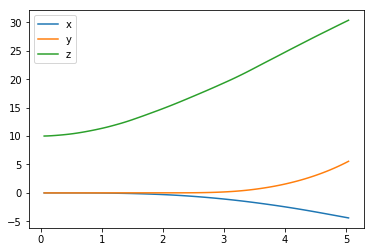

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

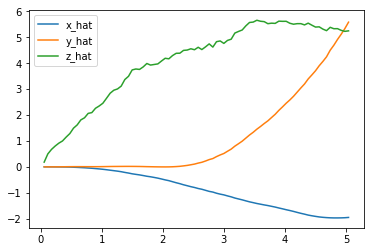

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

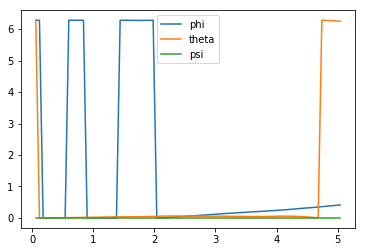

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

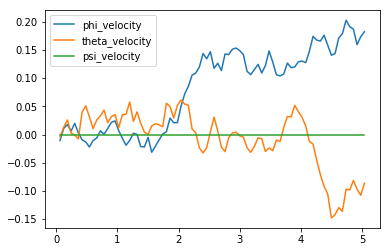

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

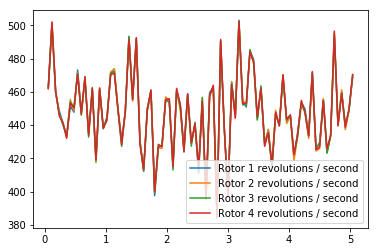

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[-4.39786842  5.56226306 30.37724818  0.41146229  6.25379184  0.        ]
[-1.95170243  5.58233608  5.24720809]
[ 0.18242868 -0.08637154  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [9]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
init_pose=np.array([0,0,1,0,0,0])
target_pos = np.array([0., 0., 10.])
task = Task(init_pose= init_pose, target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =  -5.416 (best =  -5.415), noise_scale = 3.2625

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [1]:
## TODO: Train your agent here.
import sys
import numpy as np
from IPython.core.debugger import set_trace
from agents.agent import DDPG
from soft_landing_task import Soft_Landing_Task
import matplotlib.pyplot as plt
%matplotlib inline
num_episodes = 200
init_pose = np.array([0,0,0.1,0,0,0])
task = Soft_Landing_Task(init_pose = init_pose)
agent= DDPG(task)
rewards = []
for i_episode in range(1, num_episodes + 1):
    rewards.append([])
    state = agent.reset_episode() #Start a new episode
    episode_reward = 0
    while True:
        action = agent.act(state)
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        rewards[i_episode - 1].append(reward)
        episode_reward += reward
        state = next_state
        if done:
            print("\rEpisode = {:3d}, Reward = {:7.2f}, Last Reward = {:7.2f}"
                  .format(i_episode, episode_reward, reward), end="")
            break

Using TensorFlow backend.


Episode = 200, Reward =   28.65, Last Reward =   11.47

In [2]:
new_rewards = []
num = 0
for reward in rewards:
    new_rewards.append(sum(reward))
    print(sum(reward), reward[-1])

132.08561413218206 15
126.37436567937866 10.174954213611901
142.5561334906092 15
133.22409973635803 15
71.09615909920143 6.9708925283131755
61.54337620832355 7.429751494830461
66.22660897148275 15
38.522043201324664 8.057724911475631
38.3742248042791 8.003579999950244
38.53988838829444 8.06763711685451
39.59153409135232 8.438238080850446
198.89068663851975 160
51.10468250370871 11.647129229468652
52.39082870030373 9.737976791796658
66.28926612039518 15
86.71126400477698 11.765575588860862
101.43355203494025 15
106.99619280602442 10.373889439715835
62.60552406018864 15
52.639173647410416 6.211963881282077
52.81781324150213 6.250483286604493
52.826940158645066 6.2604481203143125
52.571310545461344 6.252014846749845
51.8052807687599 6.358602085372022
50.04608950342925 6.183351312270204
67.41028591420145 10.12767185389152
86.6525854945996 15
317.00869279491315 153.88763083154527
75.87362927150598 10.38345087712079
64.93641641556279 5.530236845341671
81.72691004420257 15
65.86409249305791 6

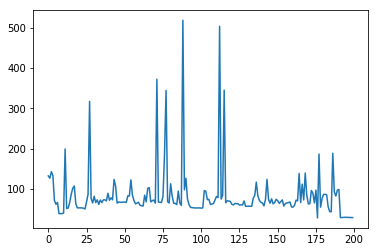

In [3]:
plt.plot(new_rewards)

In [4]:
task.switch(runtime = 10)
num_episodes = 1800
best_reward = -np.inf
prev_reward = 0
rewards = []
best_states = []
episode_states = []
last_ten = []
avg_rewards = []
avg_reward = 0
for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    episode_reward = 0
    episode_states.clear()
    while True:
        episode_states.append(state)
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(action,reward,next_state, done)
        episode_reward += reward
        state = next_state
        if done:
            avg_reward += episode_reward
            rewards.append(episode_reward)
            if i_episode > num_episodes - 10:
                last_ten.append(episode_reward)
            if episode_reward > best_reward:
                best_reward = episode_reward
                best_states.clear()
                best_states = episode_states.copy()
            print("\rEpisode = {:4d}, Reward = {:7.2f} (Best Reward = {:7.2f}), Average Reward = {:7.2f}".format(
                i_episode, episode_reward, best_reward, avg_reward/i_episode), end="")  # [debug]
            if i_episode % 25 == 0:
                avg_rewards.append(avg_reward/i_episode)
            break
    sys.stdout.flush()

Episode = 1800, Reward =   19.04 (Best Reward =  207.74), Average Reward =   58.90

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

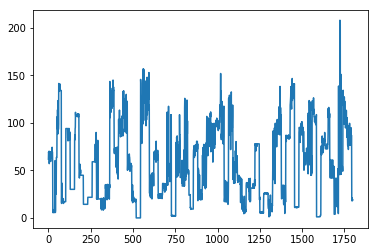

In [5]:
## TODO: Plot the rewards.
plt.plot(rewards)

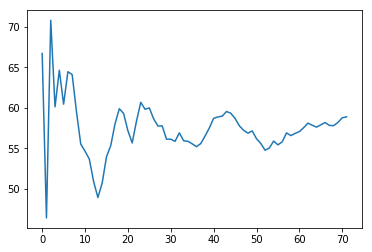

In [6]:
plt.plot(avg_rewards)

In [7]:
print(sum(last_ten) / len(last_ten))

38.26209222529103


In [8]:
new = np.reshape(best_states,[-1,7])
x = []
y = []
z = []
for n in new:
    x.append(n[0])
    y.append(n[1])
    z.append(n[2])

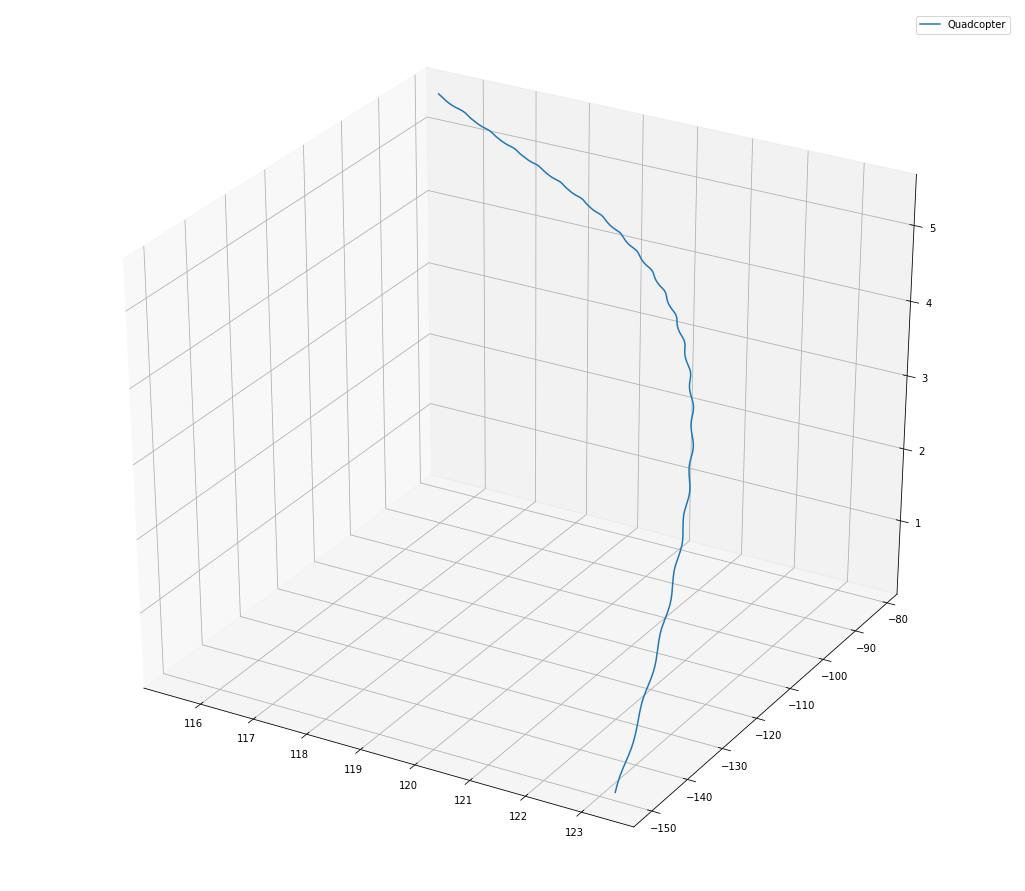

In [9]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(18, 16))
ax = fig.gca(projection='3d')
ax.plot(x,y,z, zdir='z', label = 'Quadcopter')
ax.legend()
plt.show()

In [11]:
print(episode_states)

[array([106.15788501, -70.81785167, 221.72166658,  -1.49292131,
        -1.90481089,  -1.31448838,   0.        , 106.15788501,
       -70.81785167, 221.72166658,  -1.49292131,  -1.90481089,
        -1.31448838,   0.        , 106.15788501, -70.81785167,
       221.72166658,  -1.49292131,  -1.90481089,  -1.31448838,
         0.        ]), array([ 1.06162487e+02, -7.08162594e+01,  2.21719580e+02,  4.79026597e+00,
        4.37837442e+00,  4.96869693e+00, -2.08624713e-01,  1.06176292e+02,
       -7.08114836e+01,  2.21713322e+02,  4.79027188e+00,  4.37837442e+00,
        4.96869693e+00, -4.17258561e-01,  1.06199290e+02, -7.08035274e+01,
        2.21702890e+02,  4.79028174e+00,  4.37837442e+00,  4.96869693e+00,
       -6.25920619e-01]), array([106.231462  , -70.79239752, 221.68828421,   4.79030105,
         4.37837442,   4.96869693,  -0.83462955, 106.27278211,
       -70.77810376, 221.66950386,   4.79033531,   4.37837442,
         4.96869693,  -1.04340597, 106.32321423, -70.76065902,
       2

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**: I chose to have the Quadcopter learn how to land. I designed a reward function that provides a larger reward the closer to the ground it was. If it was close to the ground, then I started to give a reward that scaled based upon the velocity. I gave a larger reward than the distance based reward, to increase the incentive to fly lower to the ground. I provide a small reward for crash landing, as I didn't want to deincentivize the model to touch the bottom. If it lands with a low enough velocity, then I return a large reward.

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)? 
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.


**Answer**:
I used the given "boiler plate" code for an actor critic method. I added batch normalization, increased the depth and number of weights on each layer, used Leaky Relu, and still ran it on a Adam Optimizer. I was reading today about AdamW, and I plan on trying to implement AdamW, as well as trying my hand at PPO, and Concept networks in my free time.

I am using a momentum and epislon for batch normalization, as well as alpha for my leaky relu.

I used an actor critic method. The actor had 4 hidden layers with batch normalization and leaky relus. Then an output layer with sigmoids for the actions generated.
The critic has two sets of two hidden layers that merge into one layer and one final hidden layer after. The hidden layers have batch normalization and leaky relus. Then it outputs to a 1 node dense layer.




**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

The task was difficult to learn, so I created a system where I could have it learn how to land first, and then train on randomized starting states.

There is a gradual learning curve, shown by the avg_rewards plot where it learns how to maximize it's reward over time. There is also an aha moment, when it first learns to land in the first training session.

The final performance of the agent is lower than the average, but that is attributable to the runtime limiting the total distance that the quadcopter can travel, given the distance to travel to land




**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:
The hardest part of the project was getting started. I didn't know at first if there were issues with the network compared to the reward function. I also rewatched most of the Reinforcement Learning content and read through the code for the Actor Critic and DDPG agent right after to see how it all worked together. The reward functions that I built at first were more complex, but ultimately, rewarding specific behavior in a clear way yielded the best results. It took me a long time to get a successful landing, as I had probably defined it poorly, and penalized crash landings, which caused the agent to avoid being in the situation that could lead to a successful landing in the first place.

I was pretty surprised to see how the copter would increase it's height, which reduced it's results, in order to stop from touching the bottom, when I was penalizing a crash landing. I was expecting it to learn how to hover by the largest reward return, but perhaps with the OUNoise providing variability, that would have been harder?

I really enjoyed this project, as much as it was a difficult thing to get started on, and I'm excited to try adding some upgrades and incorporating some state of the art aspects such as PPO, which Open AI is using with their Dota Team, and concept networks, which I learned about from Bons.ai 
I also want to implement it all without tensorflow or keras, using only numpy and try to incorporate AdamW.
